In [127]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
import os, sys, time, pickle
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection    

from scipy import optimize
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=True)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick', direction="in")
matplotlib.rc('ytick', direction="in")
matplotlib.rc('xtick', top = True)
matplotlib.rc('ytick', right =True )
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

import sympy as sp
sp.init_printing(use_latex=True)

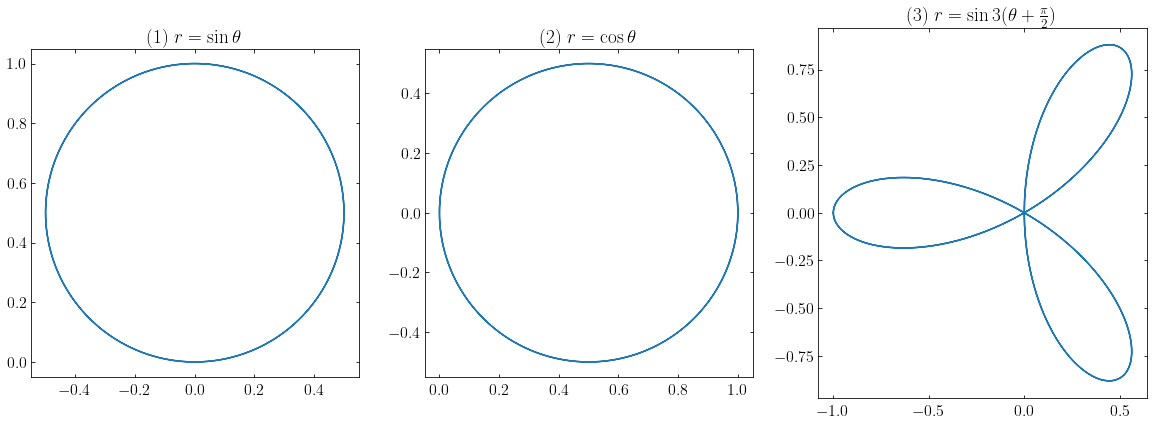

In [60]:
## 연습문제 제 4 장 2 절 2 번 
θ=np.arange(0, 2*np.pi, 0.001)
x1, y1 = np.cos(θ)*np.sin(θ), np.sin(θ)**2
x2, y2 = np.cos(θ)*np.cos(θ), np.cos(θ)*np.sin(θ)
x3, y3 = np.sin(3.*(θ+ np.pi/2.))*np.cos(θ), np.sin(3.*(θ + np.pi/2.))*np.sin(θ)

plt.figure(figsize=(20, 10))
ax1=plt.subplot(131)
ax1.plot(x1,y1)
ax1.set_aspect('equal', )
ax1.set_title("(1) $r= \sin \\theta$")

ax2=plt.subplot(132)
ax2.plot(x2,y2)
ax2.set_aspect('equal', )
ax2.set_title("(2) $r=\cos \\theta$")

ax3=plt.subplot(133)
ax3.plot(x3,y3)
ax3.set_aspect('equal')
ax3.set_title("(3) $r=\sin 3(\\theta +\\frac{\\pi}{2})$")#"+ \dfrac{\pi}{2})$")


plt.savefig("problem_4_2_2.jpg")
plt.show()


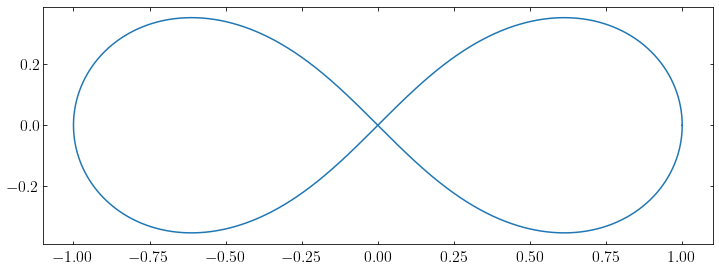

In [76]:
## 연습문제 제 4 장 2 절 3번 
θ=np.linspace(0.0, 2.0*np.pi, 10001)
r=np.sqrt(np.abs(np.cos(2*θ)))
x, y = r*np.cos(θ), r*np.sin(θ)
x=x[np.cos(2*θ)>=0]
y=y[np.cos(2*θ)>=0]
ax=plt.gca()
ax.set_aspect('equal')
plt.plot(x, y)
plt.savefig("problem_4_2_3.jpg")
plt.show()



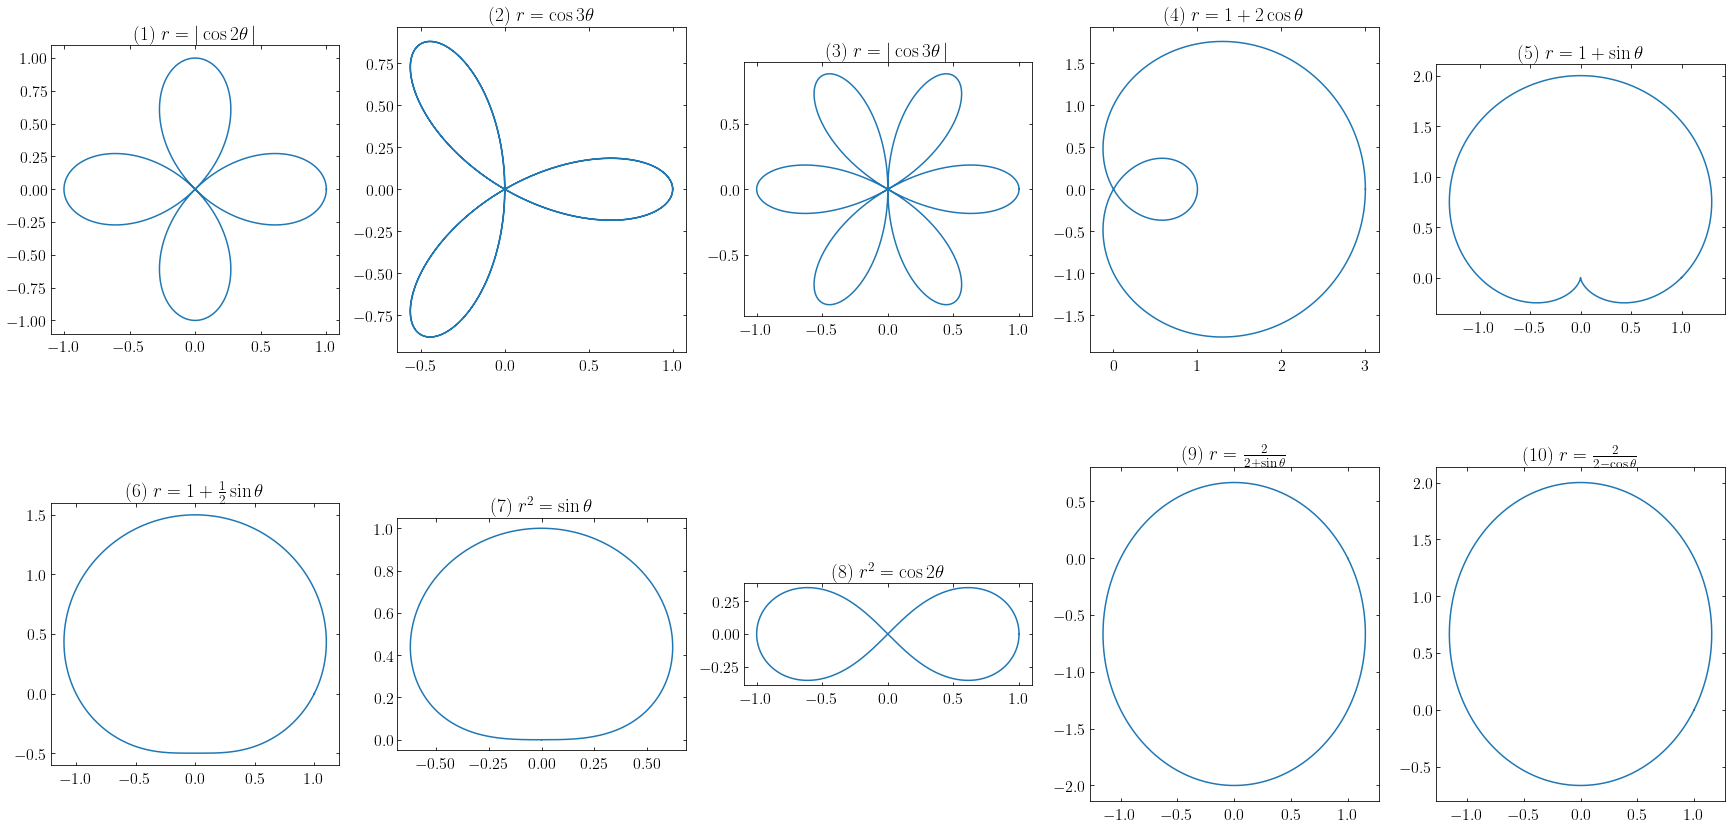

In [101]:
## 연습문제 제 4 장 2 절 4번 
def calc_Card0(r, th):
    return (r*np.cos(th), r*np.sin(th))

calc_card = np.vectorize(calc_Card0)

θ=np.linspace(0.0, 2.0*np.pi, 10001)

plt.figure(figsize=(30, 15))

ax1=plt.subplot(251)
r1=np.abs(np.cos(2*θ))
x1, y1 = calc_card(r1, θ)
ax1.plot(x1, y1)
ax1.set_aspect('equal', )
ax1.set_title("(1) $r= |\cos 2 \\theta\,|$")


ax2=plt.subplot(252)
r2=np.cos(3*θ)
x2, y2 = calc_card(r2, θ)
ax2.plot(x2, y2)
ax2.set_aspect('equal', )
ax2.set_title("(2) $r= \cos 3 \\theta$")

ax3=plt.subplot(253)
r3=np.abs(np.cos(3*θ))
x3, y3 = calc_card(r3, θ)
ax3.plot(x3, y3)
ax3.set_aspect('equal', )
ax3.set_title("(3) $r=|\cos 3 \\theta\,|$")

ax4=plt.subplot(254)
r4=1.+ 2*np.cos(θ)
x4, y4 = calc_card(r4, θ)
ax4.plot(x4, y4)
ax4.set_aspect('equal', )
ax4.set_title("(4) $r=1+2 \cos \\theta$")


ax5=plt.subplot(255)
r5=1.+ np.sin(θ)
x5, y5 = calc_card(r5, θ)
ax5.plot(x5, y5)
ax5.set_aspect('equal', )
ax5.set_title("(5) $r=1+ \sin \\theta$")


ax6=plt.subplot(256)
r6=1.+ 0.5*np.sin(θ)
x6, y6 = calc_card(r6, θ)
ax6.plot(x6, y6)
ax6.set_aspect('equal', )
ax6.set_title("(6) $r=1+ \\frac{1}{2} \sin \\theta$")


ax7=plt.subplot(257)
r7=np.sqrt(np.abs(np.sin(θ)))
x7, y7 = calc_card(r7, θ)
x7=x7[np.sin(θ) >= 0.0]
y7=y7[np.sin(θ) >= 0.0]
ax7.plot(x7, y7)
ax7.set_aspect('equal', )
ax7.set_title("(7) $r^2=\sin \\theta$")

ax8=plt.subplot(258)
r8=np.sqrt(np.abs(np.cos(2*θ)))
x8, y8 = calc_card(r8, θ)
x8=x8[np.cos(2.*θ) >= 0.0]
y8=y8[np.cos(2.*θ) >= 0.0]
ax8.plot(x8, y8)
ax8.set_aspect('equal', )
ax8.set_title("(8) $r^2=\cos 2\\theta$")


ax9=plt.subplot(259)
r9=2./(2.+np.sin(θ))
x9, y9 = calc_card(r9, θ)
ax9.plot(x9, y9)
ax9.set_aspect('equal', )
ax9.set_title("(9) $r=\\frac{2}{2+\sin\\theta} $")

ax10=plt.subplot(2, 5, 10)
r10=2./(2.-np.sin(θ))
x10, y10 = calc_card(r10, θ)
ax10.plot(x10, y10)
ax10.set_aspect('equal', )
ax10.set_title("(10) $r=\\frac{2}{2-\cos\\theta} $")

plt.savefig("problem_4_2_4.jpg")
plt.show()

In [129]:
def butterfly(a, θ):
    if a == 0:
        return (np.exp(np.sin(θ))-2 * np.cos(4*θ))
    else :
        return (np.exp(np.sin(θ))-2 * np.cos(4*θ))*(np.sin(a*θ)**4)

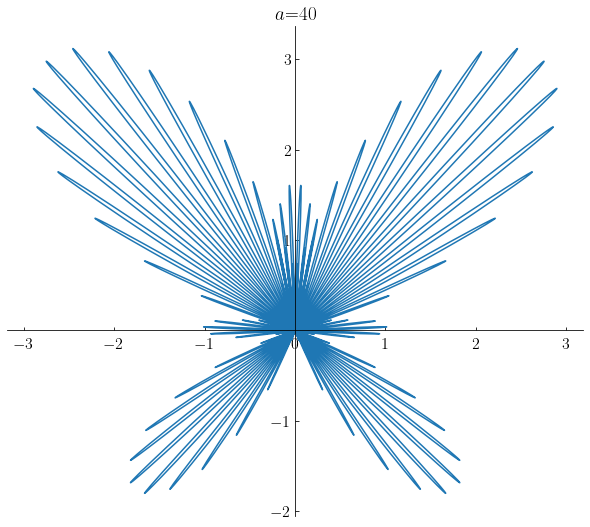

In [117]:
r=butterfly(40, θ)
x, y = calc_card(r, θ)
plt.plot(x, y)
ax=plt.gca()
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("$a$=40")

plt.savefig("preblem_4_X_2_butterfly.jpg")
plt.show()

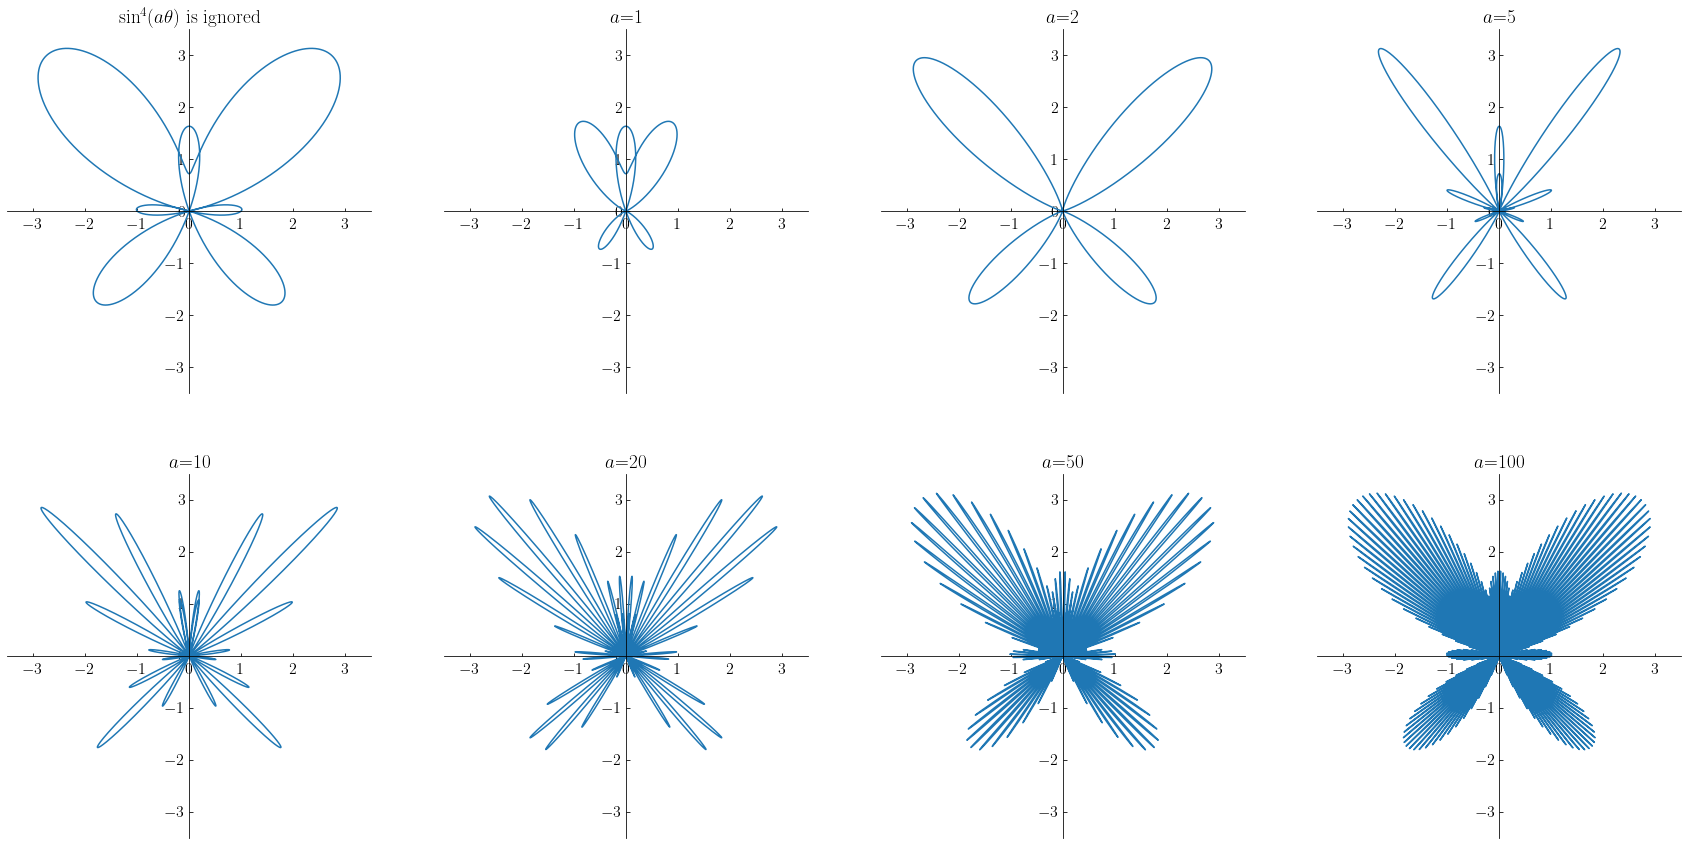

In [134]:
plt.figure(figsize=(30, 15))

aaa=[0, 1, 2, 5, 10, 20, 50, 100]
axs = []
for ind, aa in enumerate(aaa) :  
    

    axs.append(plt.subplot(2, 4, ind+1))
    ax=axs[-1]
    r=butterfly(aaa[ind], θ)
    x, y = calc_card(r, θ)
    ax.plot(x, y)
    ax.set_aspect('equal')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)
    if aa == 0:
        ax.set_title("$\sin^4 (a\\theta)$ is ignored")
    else :
        ax.set_title("$a$=%d"%(aa))

# ax2=plt.subplot(322)
# r2=butterfly(10, θ)
# x1, y1 = calc_card(r1, θ)
# ax1.plot(x1, y1)
# ax1.set_aspect('equal')
# ax1.spines['left'].set_position('zero')
# ax1.spines['right'].set_color('none')
# ax1.spines['bottom'].set_position('zero')
# ax1.spines['top'].set_color('none')

# # remove the ticks from the top and right edges
# ax1.xaxis.set_ticks_position('bottom')
# ax1.yaxis.set_ticks_position('left')
# ax1.set_title("$a$=10")




plt.savefig("preblem_4_X_2.jpg")
plt.show()